In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithmetic\IPyNb


In [3]:
df = pd.read_csv("../Python/Output/UncertainSin_19.txt", sep='\t')
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.00000
1,1,131072,0.707107,6.409876e-17,0.000000,0.707107,6.409876e-17,0.0,2.220446e-16,1.570085e-16,1.41422
2,2,65536,0.382683,5.273153e-17,-1.052713,0.923880,6.640403e-17,0.0,0.000000e+00,1.450828e-16,0.00000
3,3,32768,0.195090,8.658908e-17,0.641087,0.980785,6.629588e-17,0.0,0.000000e+00,1.489206e-16,0.00000
4,4,16384,0.098017,1.692811e-16,0.245942,0.995185,6.622694e-17,0.0,0.000000e+00,1.502867e-16,0.00000


In [4]:
df.columns

Index(['Order', 'Index', 'Sin Value', 'Sin Uncertainty',
       'Sin Normalized Error', 'Cos Value', 'Cos Uncertainty',
       'Cos Normalized Error', 'Error Value', 'Error Uncertainty',
       'Normalized Error'],
      dtype='object')

In [5]:
df['arc'] = df['Index'] / (1 << 17) * math.pi
df['lib error'] = np.sin(df['arc']) ** 2 + np.cos(df['arc']) ** 2 - 1
df.head()

,Order,Index,Sin Value,Sin Uncertainty,Sin Normalized Error,Cos Value,Cos Uncertainty,Cos Normalized Error,Error Value,Error Uncertainty,Normalized Error,arc,lib error
0,0,0,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000e+00
1,1,131072,0.707107,6.409876e-17,0.000000,0.707107,6.409876e-17,0.0,2.220446e-16,1.570085e-16,1.41422,3.141593,0.000000e+00
2,2,65536,0.382683,5.273153e-17,-1.052713,0.923880,6.640403e-17,0.0,0.000000e+00,1.450828e-16,0.00000,1.570796,0.000000e+00
3,3,32768,0.195090,8.658908e-17,0.641087,0.980785,6.629588e-17,0.0,0.000000e+00,1.489206e-16,0.00000,0.785398,2.220446e-16
4,4,16384,0.098017,1.692811e-16,0.245942,0.995185,6.622694e-17,0.0,0.000000e+00,1.502867e-16,0.00000,0.392699,0.000000e+00


In [6]:
df['lib error'].mean(),

(-1.4917830453028662e-17,)

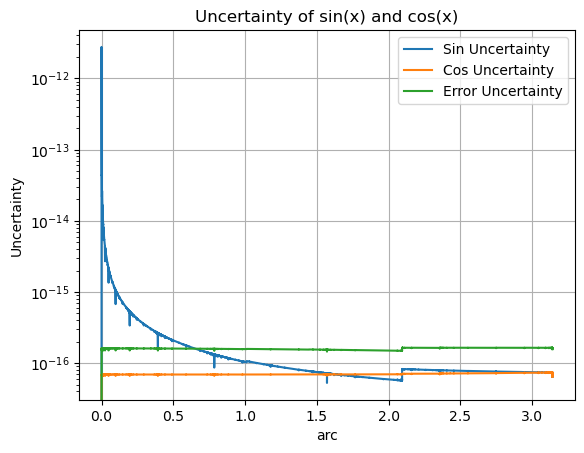

In [7]:
dfPlot = df.sort_values('arc')

fig, ax = plt.subplots()
ax.set_title(f'Uncertainty of sin(x) and cos(x)')
ax.set_xlabel('arc')
ax.set_ylabel('Uncertainty')
ax.set_yscale('log')
plt.grid(True)
ax.plot(dfPlot['arc'], dfPlot['Sin Uncertainty'], label=f'Sin Uncertainty')
ax.plot(dfPlot['arc'], dfPlot['Cos Uncertainty'], label=f'Cos Uncertainty')
ax.plot(dfPlot['arc'], dfPlot['Error Uncertainty'], label=f'Error Uncertainty')
ax.legend(bbox_to_anchor=(1.0, 1.0))

#ax2 = ax.twinx()
#ax2.set_ylabel('Error')
#ax2.plot(dfPlot['arc'], dfPlot['Normalized Error'], label=f'Normalized Error')
#ax.legend(bbox_to_anchor=(1.0, 0.8))

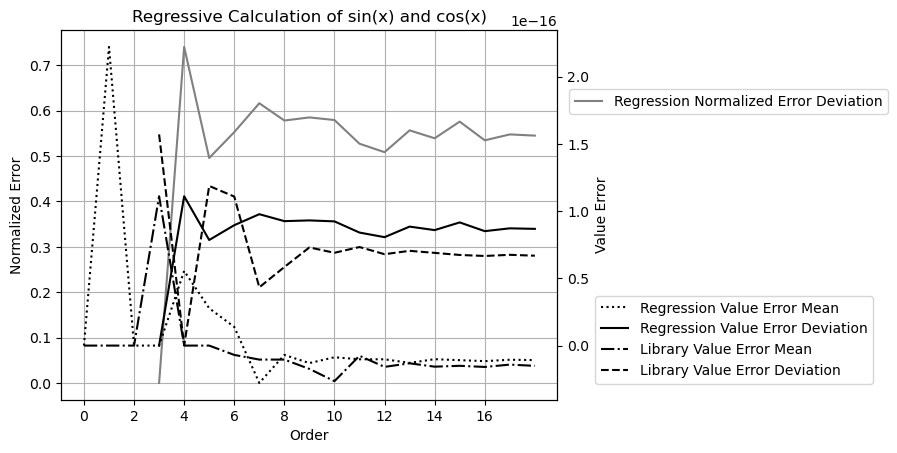

In [10]:
fig, ax = plt.subplots()
ax.set_title(f'Regressive Calculation of sin(x) and cos(x)')
ax.set_xlabel('Order')
ax.set_xticks(range(0, 18, 2))
ax.set_ylabel('Normalized Error')
plt.grid(True)

dfMean = df[['Order', 'Normalized Error']].groupby('Order').mean()
dfDev = df[['Order', 'Normalized Error']].groupby('Order').std()
ax.plot(dfDev.index, dfDev['Normalized Error'], c='gray', ls='-', label=f'Regression Normalized Error Deviation')

ax2 = ax.twinx()
ax2.set_ylabel('Value Error')
dfMean = df[['Order', 'Error Value']].groupby('Order').mean()
dfDev = df[['Order', 'Error Value']].groupby('Order').std()
ax2.plot(dfMean.index, dfMean['Error Value'], 'k:', label=f'Regression Value Error Mean')
ax2.plot(dfDev.index, dfDev['Error Value'], 'k-', label=f'Regression Value Error Deviation')

dfMean = df[['Order', 'lib error']].groupby('Order').mean()
dfDev = df[['Order', 'lib error']].groupby('Order').std()
ax2.plot(dfMean.index, dfMean['lib error'], 'k-.', label=f'Library Value Error Mean')
ax2.plot(dfDev.index, dfDev['lib error'], 'k--', label=f'Library Value Error Deviation')

ax.legend(bbox_to_anchor=(1.68, 0.86))
ax2.legend(bbox_to_anchor=(1.65, 0.3))

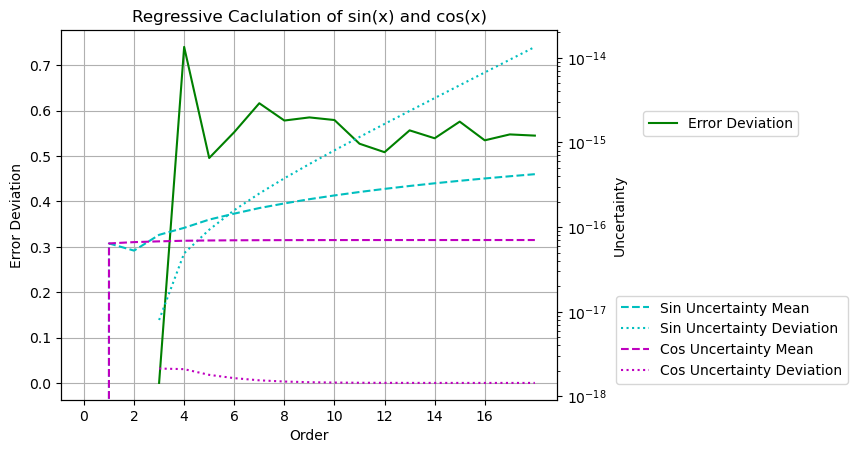

In [9]:
fig, ax = plt.subplots()
ax.set_title(f'Regressive Caclulation of sin(x) and cos(x)')
ax.set_xlabel('Order')
ax.set_xticks(range(0, 18, 2))
ax.set_ylabel('Error Deviation')
plt.grid(True)

dfDev = df[['Order', 'Normalized Error']].groupby('Order').std()
ax.plot(dfDev.index, dfDev['Normalized Error'], 'g-', label=f'Error Deviation')

ax2 = ax.twinx()
ax2.set_ylabel('Uncertainty')
ax2.set_yscale('log')
for column, color in zip(('Sin Uncertainty', 'Cos Uncertainty'), ('c', 'm')):
    dfMean = df[['Order', column]].groupby('Order').mean()
    dfDev = df[['Order', column]].groupby('Order').std()
    ax2.plot(dfMean.index, dfMean[column], f'{color}--', label=f'{column} Mean')
    ax2.plot(dfDev.index, dfDev[column], f'{color}:', label=f'{column} Deviation')

ax.legend(bbox_to_anchor=(1.5, 0.8))
ax2.legend(bbox_to_anchor=(1.6, 0.3))